# Car Insurance Claim Prediction

Predict whether the policyholder will file a claim in the next 6 months or not. 

Dataset from: https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/_2/gw71_72j1rl2l7zw22yhd9tm0000gn/T/ipykernel_47922/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Import Dataset

In [2]:
DF = pd.read_csv('Data/train.csv')

In [3]:
DF

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


## Data Exploration

In [4]:
# Check for Null Values
DF.isnull().values.any()

False

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

**Columns Grouping**

0. policy_id (object): unique identifier - Remove 
1. policy_tenure (float64): Time period of the policy - Policy                    
2. age_of_car (float64): Normlised age of the car in years - Car
3. age_of_policyholder (float64): Normalised age of policyholder in years - Policyholder
4. area_cluster (object): Area cluster of the policyholder - Policyholder 
5. population_density (int64): Population density of the city - Policyholder   
6. make (int64): Encoded Manufacturer/company of the car - Car  
7. segment (object): Segment of the car (A/B1/B2/C1/C2) - Car 
8. model (object): Encoded name of the car - Car 
9. fuel_type (object): Type of fuel used by the car - Car 
10. max_torque (object): Maximum Torque generated by the car (Nm@rpm) - Car  
11. max_power (object): Maximum Power generated by the car (bhp@rpm) - Car 
12. engine_type (object): Type of engine used in the car - Car 
13. airbags (int64): Number of airbags installed in the car - Car  
14. is_esc (object): Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not - Car 
15. is_adjustable_steering (object): Boolean flag indicating whether the steering wheel of the car is adjustable or not - Car
16. is_tpms (object): Boolean flag indicating whether Typre Pressure Monitoring System (TPMS) is present in the car or not - Car 
17. is_parking_sensors (object): Boolean flag indicating whether parking sensors are present in the car or not - Car 
18. is_parking_camera (object): Boolean flag indicating whether the parking camera is present in the car or not - Car 
19. rear_brakes_type (object): Type of breakes used in the rear of the car - Car 
20. displacement (int64): Engine displacement of the car (cc) - Car  
21. cylinder (int64): Number of cylinders present in the engine of the car - Car  
22. transmission_type (object): Transmission type of the car (auto or manual) - Car 
23. gear_box (int64): Number of gears in the car - Car  
24. steering_type (object): Type of the power steering present in the car (Power or Electric) - Car 
25. turning_radius (float64): The space a vehicle needs to make a certain turn (Meters) - Car
26. length (int64): Length of the car (millimetre) - Car  
27. width (int64): Width of the car (millimetre) - Car  
28. height (int64): Height of the car (millimetre) - Car  
29. gross_weight (int64): The maximum allowable weight of the fully-loaded car, inclduing passengers, cargo and equipment (Kg) - Car  
30. is_front_fog_lights (object): Boolean flag indicating whether front fog lights are available in the car or not - Car 
31. is_rear_window_wiper (object): Boolean flag indicating whether rear window wiper is available in the car or not - Car 
32. is_rear_window_washer (object): Boolean flag indicating whether rear window washer is available in the car or not - Car 
33. is_rear_window_defogger (object): Boolean flag indicating whether rear window defogger is available in the car or not - Car 
34. is_brake_assist (object): Boolean flag indicating whether the brake assistance feature is available in the car or not - Car 
35. is_power_door_locks (object): Boolean flag indicating whether a power door lock is avialble in the car or not - Car 
36. is_central_locking (object): Boolean flag indicating whether the central locking feature is available in the car or not - Car 
37. is_power_steering (object): Boolean flag indicating whether power steering is available in the car or not - Car 
38. is_driver_seat_height_adjustable (object): Boolean flag indicating whether the height of the driver seat is adjustable or not - Car 
39. is_day_night_rear_view_mirror (object): Boolean flag indicating whether day & night rearview mirror is present in the car or not - Car 
40. is_ecw (object): Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not - Car 
41. is_speed_alert (object): Boolean flag indicating whether the speed alert system is available in the car or not - Car 
42. ncap_rating (int64): Safety rating given by NCAP (out of 5) - Car  
43. is_claim (int64): Boolean flag indicating whether the policyholder file a claim in the next 6 months or not   

In [6]:
DF.drop(columns = 'policy_id', inplace = True)

In [7]:
# Separate Y and X Variables
Y_Variable = 'is_claim'
Y_DF = DF[Y_Variable] 
X_DF = DF.drop([Y_Variable], axis=1)

### Categorical Variables

In [8]:
# Get categorical variables
Category_DF = DF.select_dtypes(exclude = [np.number])
Category_DF

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,C8,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,C14,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,C5,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


<Axes: xlabel='is_claim'>

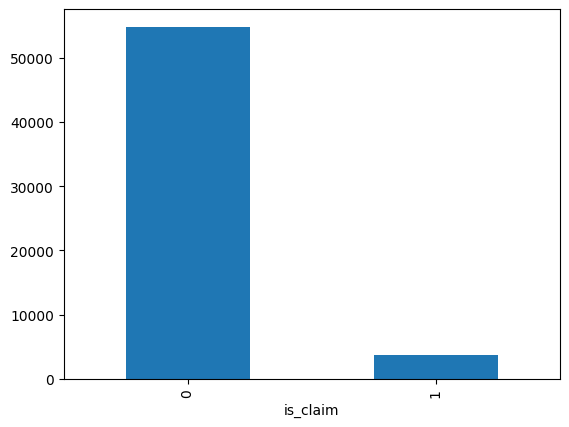

In [9]:
DF[Y_Variable].value_counts().plot(kind='bar')

**Very imbalanced data**

Consider ways of dealing with imbalanced dataset https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/:

1. **Choose Proper Evaluation Metrics - F1 Score (which is a combination of both precision and recall)**

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 Score = 2*(Precision * Recall) / (Precision + Recall) 

2. **Resampling (oversampling and undersampling)**

Oversampling - Randomly duplicating samples from the minority class in the training dataset (could lead to overfitting for some models)

Undersampling - Randomly deleting samples from the majority class (could result in losing invaluable information)

4. **Synthetic Minority Oversampling Technique (SMOTE)**

New instances are synthesized from the existing data. SMOTE looks into minority class instances and use k nearest neighbour to select a random nearest neighbour, and a synthetic instance is created randomly in feature space. 

5. **BalancedBaggingClassifier**
6. **Threshold Moving**

Change the classifier probability threshold, 50%, which is usually adopted for the balanced 50/50 dataset so that it can efficiently separate two classes. 


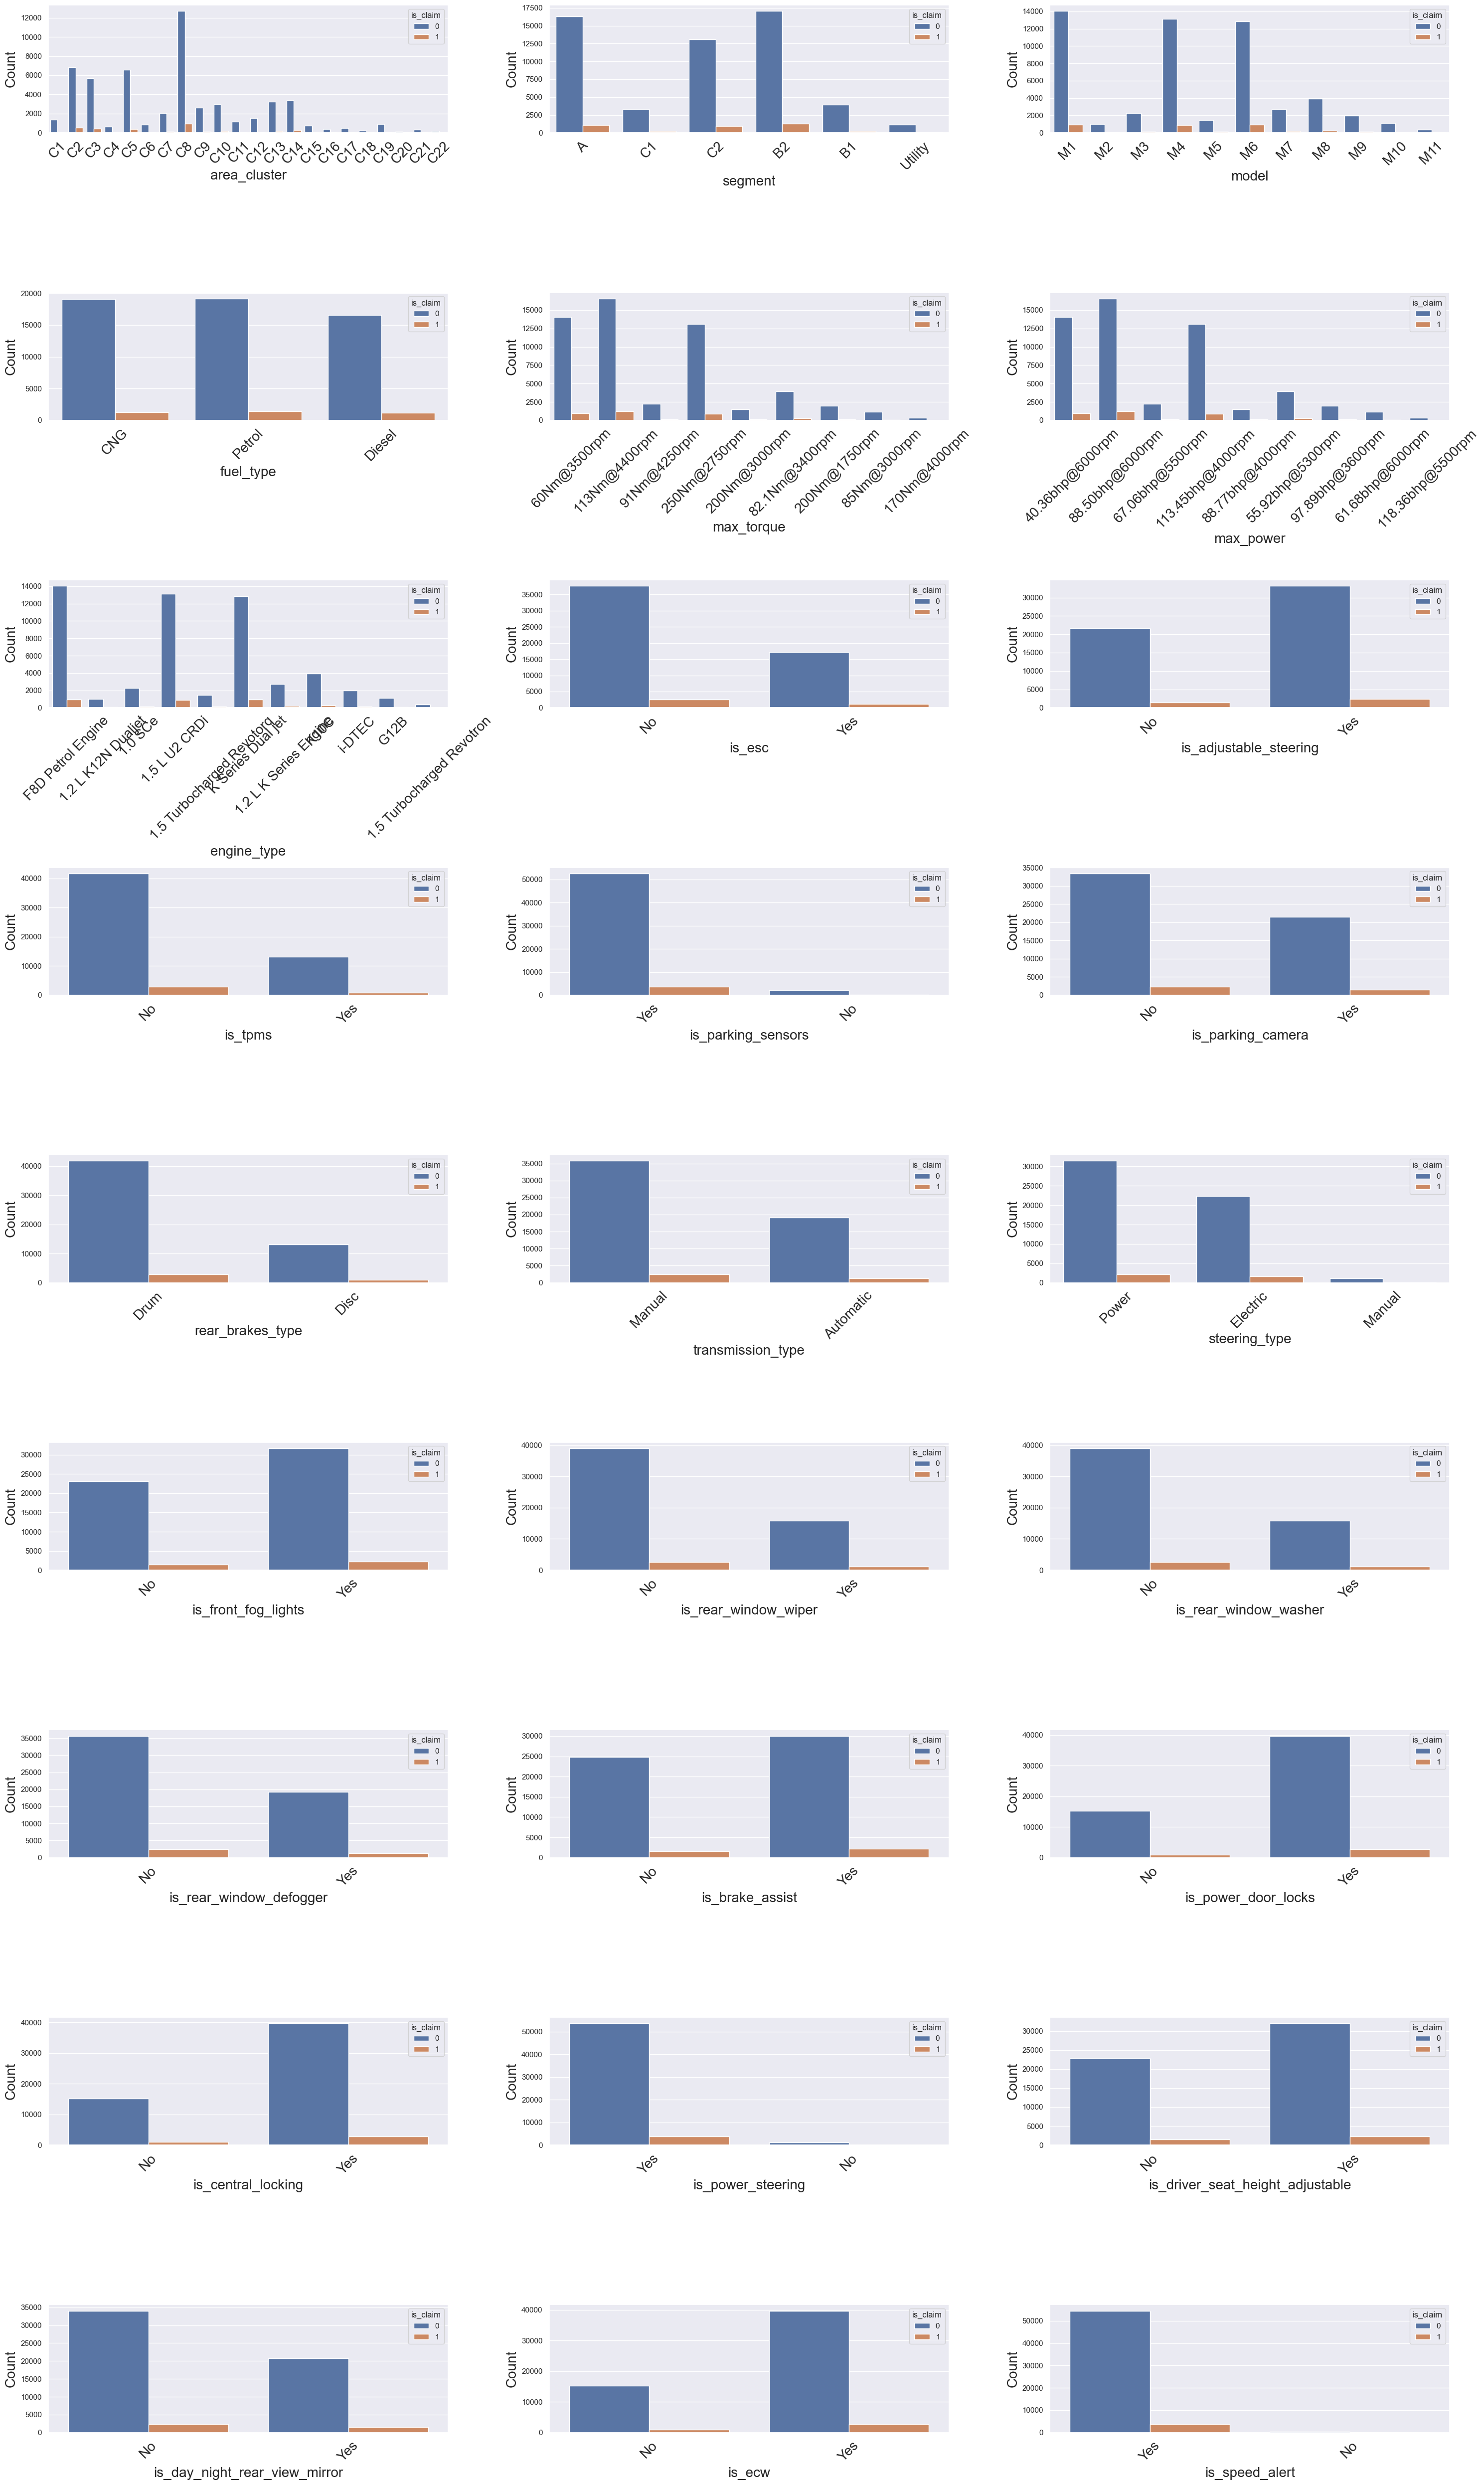

In [56]:
## VISUALIZE CATEGORICAL VARIABLES
y_label = 'Count'

# Plotting each of the input variable against the count of policyholder that have filed a claim
ncols = 3
nrows = len(Category_DF.columns)//ncols

fig, axs = plt.subplots(nrows, ncols, figsize = (30, 50))
axs = axs.flatten()

for i, col in enumerate(Category_DF.columns):
    ax = axs[i]
    sns.countplot(data = DF, 
                  x= col, ax = ax, 
                  hue = 'is_claim')
    
    ax.set_ylabel(y_label, fontsize = 20)
    ax.set_xlabel(col, fontsize = 20)
    ax.tick_params(axis='x', rotation=45, labelsize = 20)
    
plt.tight_layout()
plt.show()
                  

### Numerical Variables

In [9]:
# Get numerical variables
Numerical_DF = DF.drop(Category_DF, axis = 1)
Numerical_DF

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,0
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0
58588,1.199642,0.02,0.519231,7788,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
58589,1.162273,0.05,0.451923,34738,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
58590,1.236307,0.14,0.557692,8794,1,2,1197,4,5,4.8,3845,1735,1530,1335,2,0


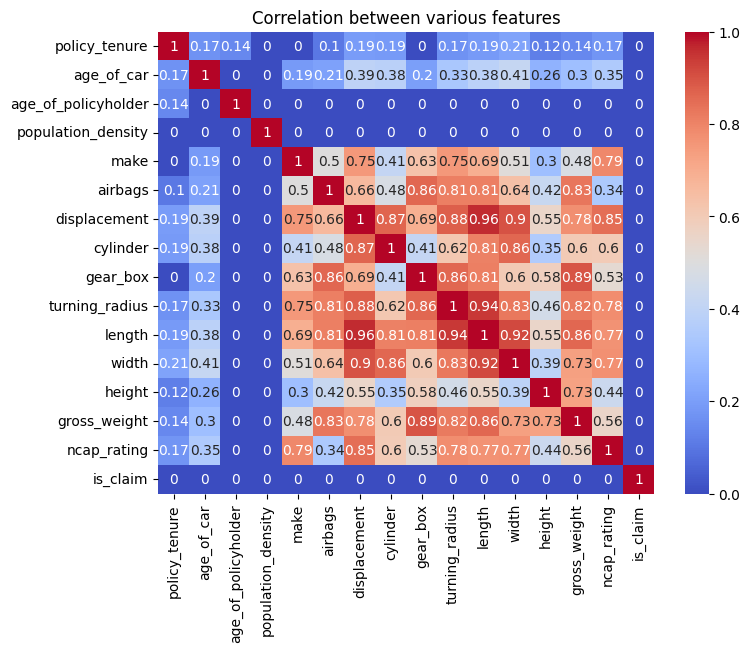

In [12]:
# Visualizing the correlation using heatmaps from seaborn library

highcorr = Numerical_DF.corr()
highcorr[np.abs(highcorr < 0.1)] = 0
plt.figure(figsize=(8,6))
sns.heatmap(highcorr, annot = True, cmap = 'coolwarm')
plt.title("Correlation between various features")
plt.show()# Visualizing the correlation using heatmaps from seaborn library

There is no correlation between the target variables and the rest of numerical variables. Could be removed from the datatset?

## Data Processing

### Categorical Variables

**For non-tree based modelling**
- Convert all the binaries to 0 and 1 (label encoding).
- For categorical variables with more than 2 values will be one-hot encoded.

**Ordinal Data (has an order):** max_torque, max_power, 

**Nominal (no order):** area_cluster, segment, model, fuel_type, engine_type, steering_type

**Binary:** is_esc, is_adjustable_steering, is_tpms, is_parking_sensors, is_parking_camera, rear_brakes_type, transmission_type,
is_front_fog_lights, is_rear_window_wiper, is_rear_window_washer, is_rear_window_defogger, is_brake_assist, is_power_door_locks, 
is_central_locking, is_power_steering, is_driver_seat_height_adjustable, is_day_night_rear_view_mirror, is_ecw, is_speed_alert

## Train Test

In [ ]:
from sklearn.model_selection import train_test_split

In [27]:
X = DF.drop(columns = 'is_claim')
y = DF['is_claim']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123) 

In [45]:
print('Number of training dataset: ', len(X_train))
print('Number of testing dataset: ', len(X_test))

Number of training dataset:  46873
Number of testing dataset:  11719


In [46]:
print('Number of claims: ', y_train.value_counts())
print('Number of claims: ', y_test.value_counts())

Number of claims:  is_claim
0    43925
1     2948
Name: count, dtype: int64
Number of claims:  is_claim
0    10919
1      800
Name: count, dtype: int64


### Model Training